# Viewing the dataset

This notebook demonstrates how to access metadata and arrays from the HDF5 dataset.

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the dataset

Make sure to update the filepath in the block below!

In [2]:
h5_filepath = '/data/bwedig/mejiro/training_set_dev/roman_data_v1.h5'  # TODO update this path!
f = h5py.File(h5_filepath, 'r')

In [15]:
# specify band
band = 'F129'

true_lenses, false_lenses = [], []
for i, uid in enumerate(f[band]):
    if f[band][uid].attrs.get('is_strong_lens', True):
        true_lenses.append(f[band][uid])
    else:
        false_lenses.append(f[band][uid])
    if i == 51:
        break

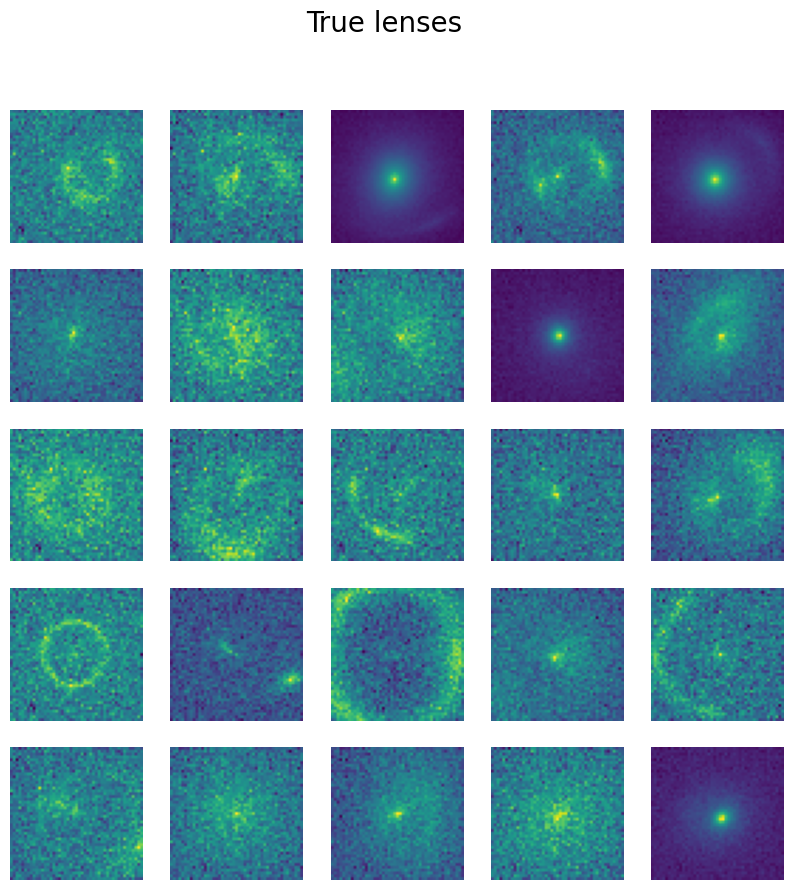

In [16]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    ax.flat[i].imshow(np.log10(true_lenses[i]))
    ax.flat[i].axis('off')
plt.suptitle('True lenses', fontsize=20)
plt.show()

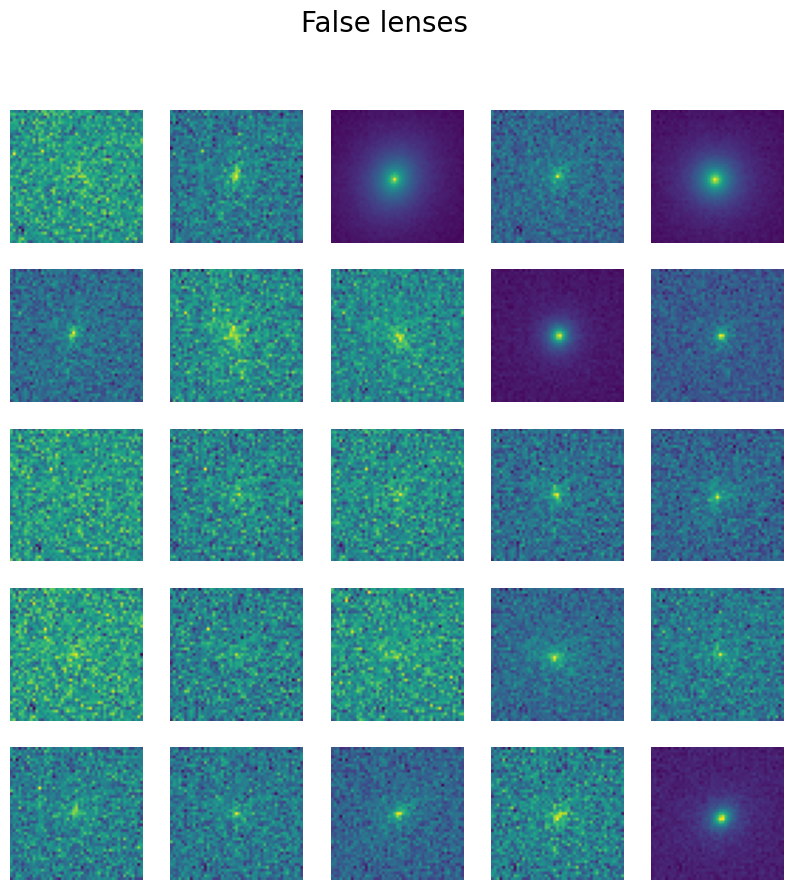

In [17]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    ax.flat[i].imshow(np.log10(false_lenses[i]))
    ax.flat[i].axis('off')
plt.suptitle('False lenses', fontsize=20)
plt.show()